In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

 * Beautiful soup does not support  javascripts rendering.
 * Beautiful soup is fast

In [3]:
url = "https://coinmarketcap.com/"
request=requests.get(url)
request

<Response [200]>

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta content="https://coinmarketcap.com/" property="og:url"/><link href="https://coinmarketcap.com/" rel="canonical"/><link href="https://coinmarketcap.com/ar/" hreflang="ar" rel="alternate"/><link href="https://coinmarketcap.com/bg/" hreflang="bg" rel="alternate"/><link href="https://coinmarketcap.com/cs/" hreflang="cs" rel="alternate"/><link href="https://coinmarketcap.com/da/" hreflang="da" rel="alternate"/><link href="https://coinmarketcap.com/de/" hreflang="de" rel="alternate"/><link href="https://coinmarketcap.com/el/" hreflang="el" rel="alternate"/><link href="https://coinmarketcap.com/" hreflang="en" rel="alternate"/><link href="https://coinmarketcap.com/es/" hreflang="es" rel="alternate"/><link href="https://coinmarketcap.com/fi/" hr
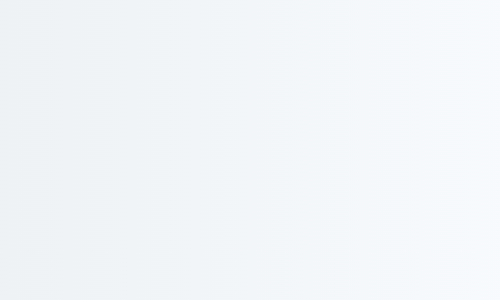

In [4]:
soup = BeautifulSoup(request.content, 'html.parser')
soup

In [5]:
table = soup.find('table', class_="cmc-table")
table

<table class="sc-db1da501-3 ccGPRR cmc-table"><colgroup><col/><col style="width:50px;min-width:auto;max-width:auto"/><col style="width:250px;min-width:auto;max-width:auto"/><col/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col/></colgroup><thead><tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-65e7f566-0 BmVAr"><span class="sc-65e7f566-0 iSzLgt rank-column-title">#</span></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e297ecb-0 bSCmGv sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></

In [6]:
rows=table.find_all('tr')
rows

[<tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-65e7f566-0 BmVAr"><span class="sc-65e7f566-0 iSzLgt rank-column-title">#</span></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e297ecb-0 bSCmGv sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span></div></div></th><th class="stickyTop" style="text-align:end"><div class="sc-e297ecb-0 kPErdo sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Price</p></div></div></th><th class="stickyTop" style="text-align:end"><div class="sc-e297ecb-0 kPErdo sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span><p class="sc-71024e3

In [9]:

Coin_Cap = []

for row in rows[1:11]:
    table_data = row.find_all('td')
    rank = table_data[1].text
    name =table_data[2].text
    price =table_data[3].text
    hour_change =table_data[4].text
    day_change =table_data[5].text
    seven_days =table_data[6].text
    market_cap =table_data[7].text
    volume = table_data[8].text

    
     # Append data as a dictionary to the list
    Coin_Cap.append({
        'Rank': rank,
        'Name': name,
        'Price': price,
        '1h Change': hour_change,
        '24h Change': day_change,
        '7d Change': seven_days,
        'Market Cap': market_cap,
        'Volume': volume
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(Coin_Cap)

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('coin_data.csv', index=False)

  

  Rank          Name       Price 1h Change 24h Change 7d Change  \
0    1    BitcoinBTC  $95,439.84     0.01%      0.84%     1.29%   
1    2   EthereumETH   $1,829.40     0.01%      0.02%     1.42%   
2    3    TetherUSDT       $1.00     0.01%      0.01%     0.02%   
3    4        XRPXRP       $2.17     0.34%      0.64%     3.06%   
4    5        BNBBNB     $587.54     0.27%      2.03%     2.51%   
5    6     SolanaSOL     $147.34     0.09%      0.21%     1.45%   
6    7      USDCUSDC       $1.00     0.03%      0.02%     0.01%   
7    8  DogecoinDOGE     $0.1724     0.11%      2.42%     4.24%   
8    9    CardanoADA     $0.6856     0.16%      4.42%     2.32%   
9   10       TRONTRX     $0.2481     0.04%      0.72%     0.39%   

                 Market Cap                      Volume  
0  $1.89T$1,894,797,607,385  $15,842,293,273166.04K BTC  
1   $220.7B$220,701,514,672     $8,753,691,9444.78M ETH  
2  $149.41B$149,405,794,533  $36,748,971,11136.73B USDT  
3  $127.43B$127,425,128,728   

In [10]:
df1 = pd.read_csv('coin_data.csv')
df1

,Rank,Name,Price,1h Change,24h Change,7d Change,Market Cap,Volume
0,1,BitcoinBTC,"$95,439.84",0.01%,0.84%,1.29%,"$1.89T$1,894,797,607,385","$15,842,293,273166.04K BTC"
1,2,EthereumETH,"$1,829.40",0.01%,0.02%,1.42%,"$220.7B$220,701,514,672","$8,753,691,9444.78M ETH"
2,3,TetherUSDT,$1.00,0.01%,0.01%,0.02%,"$149.41B$149,405,794,533","$36,748,971,11136.73B USDT"
3,4,XRPXRP,$2.17,0.34%,0.64%,3.06%,"$127.43B$127,425,128,728","$1,472,293,103675.96M XRP"
4,5,BNBBNB,$587.54,0.27%,2.03%,2.51%,"$82.78B$82,775,917,898","$1,276,601,2502.17M BNB"
5,6,SolanaSOL,$147.34,0.09%,0.21%,1.45%,"$76.33B$76,333,940,723","$1,492,512,83010.12M SOL"
6,7,USDCUSDC,$1.00,0.03%,0.02%,0.01%,"$61.53B$61,531,293,470","$5,250,670,2495.24B USDC"
7,8,DogecoinDOGE,$0.1724,0.11%,2.42%,4.24%,"$25.71B$25,710,369,773","$579,302,9173.36B DOGE"
8,9,CardanoADA,$0.6856,0.16%,4.42%,2.32%,"$24.2B$24,204,566,498","$704,560,9321.02B ADA"
9,10,TRONTRX,$0.2481,0.04%,0.72%,0.39%,"$23.55B$23,552,607,090","$367,677,3311.48B TRX"
